# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2024

## Homework 5
Due Wednesday, February 21

### Problem 1

What does the following function compute (in terms of $x,y$)? Explain why.

```julia
function fun1(x,y)
    if x == 0
        return y
    else
        return fun1(x - 1, x + y)
    end
end
```

此函数的作用是计算下面的数学表达式 T(x,y)
T(x,y)：

T(x,y)=x+(x−1)+(x−2)+…+1+y
T(x,y)=x+(x−1)+(x−2)+…+1+y

原因是这个递归函数每次减少 xx 的值，直到 xx 变为 0，并在每次递归调用中将当前的 xx 值加到 yy 上。当 xx 达到 0 时，函数返回当前的 yy 值，这个值就是从 xx 到 1 的所有数字之和加上原始 yy 的值。

### Problem 2

What does the following function compute (in terms of $a,b$)? Explain why.


```julia
function fun2(a,b)
    if b == 0
        return 1
    elseif b % 2 == 0
        return fun2(a * a, b ÷ 2)
    else
        return fun2(a * a, b ÷ 2) * a
    end
end
```

此函数是用于计算 abab，使用了快速幂算法。快速幂算法通过将指数每次除以 2 来减少计算量，这样可以显著提高效率。具体来说：
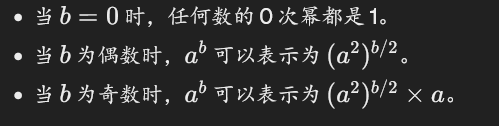
这种方式大大减少了乘法的次数，提高了计算效率。

### Problem 3

Predict the output of the code below (try first without running it):

```julia
function fun3(x)
    if x > 0
        x -= 1
        fun3(x)
        print(x, " ")
        x -= 1
        fun3(x)
    end
end

fun3(5)
```

In [14]:
function fun3(x)
    if x > 0
        print(x, " ")
        x -= 1
        fun3(x)
        print(x, " ")
        println("==========")
        # x -= 1
        # fun3(x)
    end
end

fun3(5)

5 4 3 2 1 0 ==========
1 ==========
2 ==========
3 ==========
4 ==========


In [15]:
function fun3(x)
    if x > 0
        print(x, " ")
        x -= 1
        fun3(x)
        print(x, " ")
        # println("==========")
        x -= 1
        fun3(x)
    end
end

fun3(5)

5 4 3 2 1 0 1 2 1 0 3 2 1 0 1 4 3 2 1 0 1 2 1 0 

### Problem 4 - Mandelbrot set

The Mandelbrot set is the set of complex numbers $z_0 = C$ such that the quadratic recurrence equation

$$
z_{n+1} = z_n^2 + C
$$

does not tend to infinity.

To visualize the set, you will:

1. Create a matrix of points $C$ in the complex plane
2. Iterate the recurrence for each point $C$ until $|z_n|>4$, and count the number of iterations $n$
3. For the points where the number of iterations exceeds `maxiter`, we will assume that the sequence is convergent and set $n=0$
4. Visualize the set by an image plot of the $n$-values


### Problem 4(a)

Write a function with the syntax

```julia
    function mkCmatrix(xmin, xmax, ymin, ymax, nx, ny)
```

which computes `nx` equally spaced numbers $x_k$ from `xmin` to `xmax`, `ny` equally spaced numbers $y_j$ from `ymin` to `ymax`, and returns the `ny`-by-`nx` matrix $C$ with complex entries $C_{jk} = x_k + iy_j$.

In [24]:
# 这个函数创建了一个复数矩阵，其中每个元素代表复平面上的一个点。
function mkCmatrix(xmin, xmax, ymin, ymax, nx, ny)
    x = LinRange(xmin, xmax, nx)
    y = LinRange(ymin, ymax, ny)
    C = [Complex{Float64}(x[i], y[j]) for j in 1:ny, i in 1:nx]
    return C
end

C = mkCmatrix(-2.25, 0.75, -1.25, 1.25, 600, 500)


mkCmatrix (generic function with 1 method)

### Problem 4(b)

Write a function

```julia
   function mandelbrot_set(C, maxiter)
```

which takes a matrix $C$ as described above and an integer `maxiter`, and returns an integer matrix $N$ of the same size as $C$ containing the iteration counts $n$ as described above.

In [18]:
function mandelbrot_set(C, maxiter)
    nrows, ncols = size(C)
    N = zeros(Int, nrows, ncols)
    for j in 1:ncols
        for i in 1:nrows
            n = 0
            z = 0
            while (abs(z) <= 4 && n < maxiter)
                z = z^2 + C[i, j]
                n += 1
            end
            N[i, j] = n
        end
    end
    return N
end


mandelbrot_set (generic function with 1 method)

### Problem 4(c)

Run the code below to visualize the set.

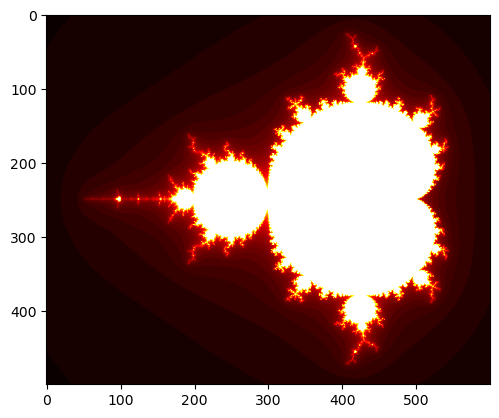

PyObject <matplotlib.image.AxesImage object at 0x000001F193619D80>

In [33]:

# 创建复数矩阵以进行 Mandelbrot 计算
C = mkCmatrix(-2.25, 0.75, -1.25, 1.25, 600, 500)

# 设置最大迭代次数
maxiter = 50

# 计算 Mandelbrot 集的迭代次数
N = mandelbrot_set(C, maxiter)

# 使用热图绘制结果
imshow(N, cmap=ColorMap("hot"))

### Problem 5 - Koch curve

A Koch curve between two points $(x_1,y_1)$ and $(x_2,y_2)$ can be defined as follows:

1. If `level` is zero, draw a straight line between the two points
2. Otherwise, define the following 3 additional points

$$
\begin{align*}
\Delta x &= x2 - x1 \\
\Delta y &= y2 - y1 \\
x_3 &= x1 + \Delta x / 3 \\
y_3 &= y1 + \Delta y / 3 \\
x_5 &= x1 + 2\Delta x / 3 \\
y_5 &= y1 + 2\Delta y / 3 \\
x_4 &= (x1 + x2) / 2 - \Delta y / 2\sqrt{3} \\
y_4 &= (y1 + y2) / 2 + \Delta x / 2\sqrt{3} \\
\end{align*}
$$

3. Draw Koch curves of level `level - 1` between the following pairs of points:

$$
\begin{align*}
(x_1, y_1)&\text{ to }(x_3, y_3) \\
(x_3, y_3)&\text{ to }(x_4, y_4) \\
(x_4, y_4)&\text{ to }(x_5, y_5) \\
(x_5, y_5)&\text{ to }(x_2, y_2) \\
\end{align*}
$$

### Problem 5(a)

Write a function

```julia
function koch_curve(x1, y1, x2, y2, level)
```

which draws a Koch curve as described above.

In [34]:
using PyPlot

function koch_curve(x1, y1, x2, y2, level)
    if level == 0
        plot([x1, x2], [y1, y2], "b")
    else
        Δx = x2 - x1
        Δy = y2 - y1
        x3 = x1 + Δx / 3
        y3 = y1 + Δy / 3
        x5 = x1 + 2 * Δx / 3
        y5 = y1 + 2 * Δy / 3
        x4 = (x1 + x2) / 2 - Δy / (2sqrt(3))
        y4 = (y1 + y2) / 2 + Δx / (2sqrt(3))
        
        koch_curve(x1, y1, x3, y3, level - 1)
        koch_curve(x3, y3, x4, y4, level - 1)
        koch_curve(x4, y4, x5, y5, level - 1)
        koch_curve(x5, y5, x2, y2, level - 1)
    end
end


koch_curve (generic function with 1 method)

### Problem 5(b)

Draw a Koch curve of level 4 between the points $(0,0)$ and $(3,0)$. Use `axis("equal")`.

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


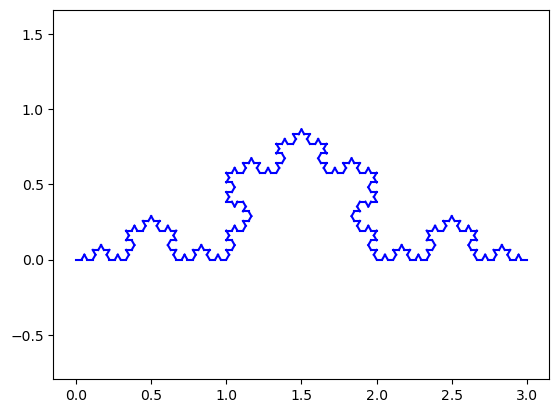

In [35]:
using PyPlot

function koch_curve(x1, y1, x2, y2, level)
    if level == 0
        plot([x1, x2], [y1, y2], "b")
    else
        Δx = x2 - x1
        Δy = y2 - y1
        x3 = x1 + Δx / 3
        y3 = y1 + Δy / 3
        x5 = x1 + 2 * Δx / 3
        y5 = y1 + 2 * Δy / 3
        x4 = (x1 + x2) / 2 - Δy / (2sqrt(3))
        y4 = (y1 + y2) / 2 + Δx / (2sqrt(3))
        
        koch_curve(x1, y1, x3, y3, level - 1)
        koch_curve(x3, y3, x4, y4, level - 1)
        koch_curve(x4, y4, x5, y5, level - 1)
        koch_curve(x5, y5, x2, y2, level - 1)
    end
end

figure()
koch_curve(0, 0, 3, 0, 4)
axis("equal")
show()

### Problem 5(c)

Draw three Koch curves of level 4 to make the outline of a snowflake. This can be done by generating Koch curves around each edge of an equilateral triangle.

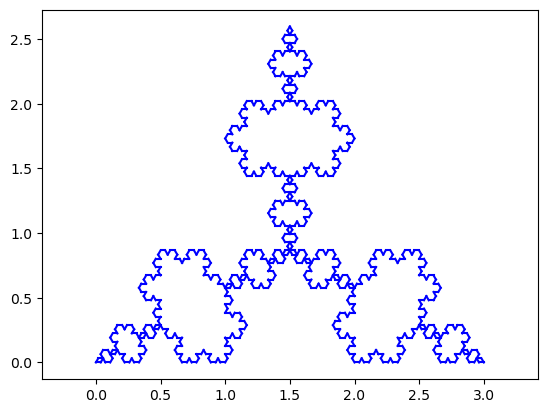

In [36]:
using PyPlot

function koch_curve(x1, y1, x2, y2, level)
    if level == 0
        plot([x1, x2], [y1, y2], "b")
    else
        Δx = x2 - x1
        Δy = y2 - y1
        x3 = x1 + Δx / 3
        y3 = y1 + Δy / 3
        x5 = x1 + 2 * Δx / 3
        y5 = y1 + 2 * Δy / 3
        x4 = (x1 + x2) / 2 - Δy / (2sqrt(3))
        y4 = (y1 + y2) / 2 + Δx / (2sqrt(3))
        
        koch_curve(x1, y1, x3, y3, level - 1)
        koch_curve(x3, y3, x4, y4, level - 1)
        koch_curve(x4, y4, x5, y5, level - 1)
        koch_curve(x5, y5, x2, y2, level - 1)
    end
end

function draw_snowflake()
    # Define the vertices of an equilateral triangle
    length = 3
    h = length * sqrt(3) / 2
    x1, y1 = 0, 0
    x2, y2 = length, 0
    x3, y3 = length / 2, h

    figure()
    koch_curve(x1, y1, x2, y2, 4)
    koch_curve(x2, y2, x3, y3, 4)
    koch_curve(x3, y3, x1, y1, 4)
    axis("equal")
    show()
end

draw_snowflake()
